RAINFALL WEATHER FORECASTING 

Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
Objective:

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


In [1]:
#Importing necessary libraries-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [152]:
#Reading dataset-
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [153]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
#Checking random samples
data.sample(15)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
5962,2011-07-28,Melbourne,4.6,16.0,0.2,2.6,9.4,N,61.0,N,...,70.0,35.0,1026.8,1023.6,1.0,2.0,8.4,15.6,No,No
3410,2017-05-30,Williamtown,4.2,16.9,0.0,NaN,NaN,WNW,43.0,WNW,...,64.0,39.0,1023.7,1020.5,NaN,NaN,9.4,16.4,No,No
6005,2011-09-09,Melbourne,7.6,15.6,7.8,3.0,6.1,SSW,67.0,WSW,...,90.0,46.0,1015.1,1015.3,NaN,NaN,8.2,14.4,Yes,Yes
3419,2017-06-08,Williamtown,10.5,17.6,49.2,NaN,NaN,SE,39.0,WSW,...,97.0,87.0,1022.3,1021.3,8.0,8.0,14.3,16.9,Yes,Yes
6150,2011-01-21,Brisbane,20.7,28.5,4.4,6.0,8.0,ESE,43.0,SE,...,77.0,51.0,1012.2,1010.7,7.0,5.0,23.8,27.9,Yes,No
5275,2011-11-29,Melbourne,18.4,34.7,0.0,6.8,1.6,N,70.0,N,...,34.0,15.0,1005.8,1003.7,7.0,7.0,27.7,33.9,No,Yes
3641,2009-06-23,Wollongong,11.3,19.1,0.2,NaN,NaN,WSW,26.0,NaN,...,71.0,68.0,1019.6,1016.5,NaN,NaN,15.8,18.1,No,No
2626,2015-03-02,Penrith,18.3,23.8,4.0,NaN,NaN,SW,22.0,SSW,...,60.0,60.0,NaN,NaN,NaN,NaN,20.0,22.5,Yes,No
1086,2009-09-05,CoffsHarbour,14.8,21.2,1.6,2.8,9.2,S,44.0,S,...,67.0,53.0,1013.5,1013.5,3.0,3.0,19.2,19.6,Yes,No
267,2009-08-25,Albury,7.1,12.8,2.0,NaN,NaN,W,85.0,W,...,75.0,53.0,1009.6,1008.2,3.0,NaN,7.7,11.7,Yes,Yes


In [8]:
#Checking shape-
data.shape

(8425, 23)

In [6]:
#Checking data type and nulls-
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

Columns lile Date, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow have object type data and remaining columns have float data type.
A lot of columns have null values

In [7]:
#Validating nulls
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Except Date and Location, all other variables have missing values. Evaporation and Sunshine have 3512 and 3994 missing values which are the highest nulls.
Pressure9am, Pressure3pm, Cloud3pm and Cloud9am also have high number of missing values

In [9]:
#Checking for better insights
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


Observations-

1. There are high number of null values present in almost all variables.


2. Few variables like Rainfall, Evaporation, WindGustSpeed have high difference in 75% and max which clearly indicated the presence of outliers.


4. The distribution for most of the features seem to be normal.

In [10]:
#Let's check number of unique values
data.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [11]:
data['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
data['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [13]:
data['Cloud9am'].unique()

array([ 8., nan,  7.,  1.,  0.,  5.,  4.,  2.,  6.,  3.])

In [14]:
data['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [154]:
#Handling the Object type column- Date
import datetime as dt

In [155]:
data['Date']=pd.to_datetime(data['Date'])

In [156]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [157]:
data['Day']=data['Date'].dt.day
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year

In [158]:
data.drop(columns=['Date'], axis=1, inplace=True)

In [159]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18  Temp9am 

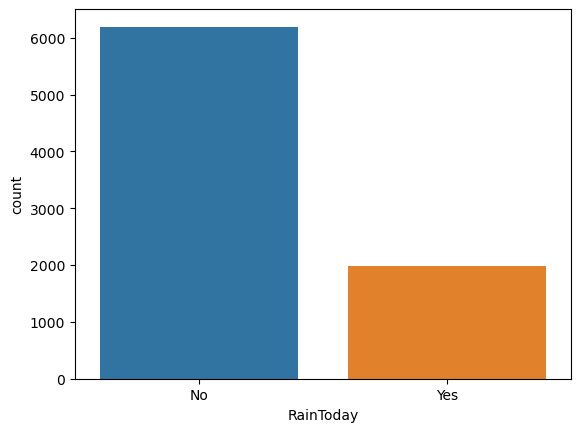

In [22]:
#Let's check the count of Yes and No for Today's rainfall
sns.countplot(x='RainToday', data=data)
plt.show()

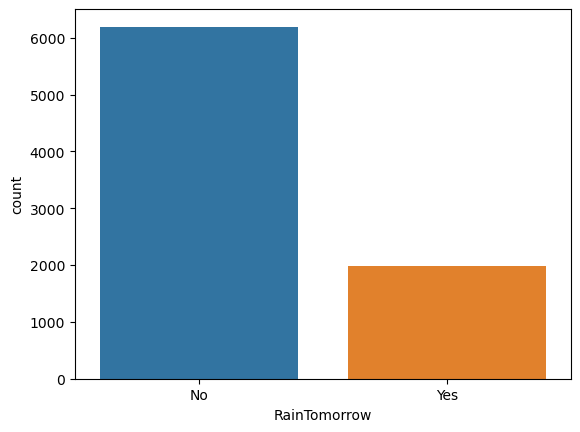

In [23]:
#Let's check the count of Yes and No for tomorrrow's rainfall
sns.countplot(x='RainTomorrow', data=data)
plt.show()

The count of No is much higher than the count of yes which means there is maximum probability of no rain for most locations

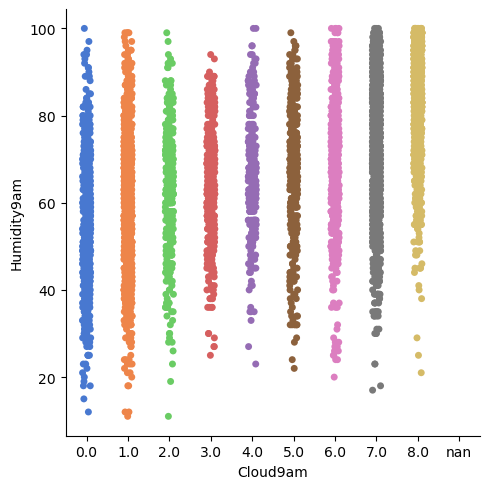

In [28]:
#Checking cloud cover at 9 am with relation to Humidity at 9 am
sns.catplot(x='Cloud9am', y='Humidity9am', data=data, hue='Cloud9am', palette='muted')
plt.show()

Humidity increases when the cloud cover is more. When Cloud cover is 3, humidity is between 30 to 85 and when the cloud cover is 8, humidity is between 40-100

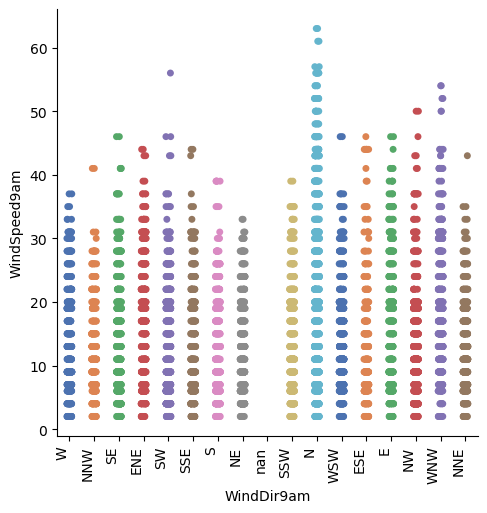

In [33]:
#Checking Wind Direction at 9am with relation to Wind Speed at 9am   
sns.catplot(x='WindDir9am', y='WindSpeed9am', data=data, hue='WindDir9am', palette='deep')
plt.xticks(rotation=90, ha='right')
plt.show()

The Speed of wind at 9 am is highest in the North Direction(N) and lowest in (NNW) North North-West

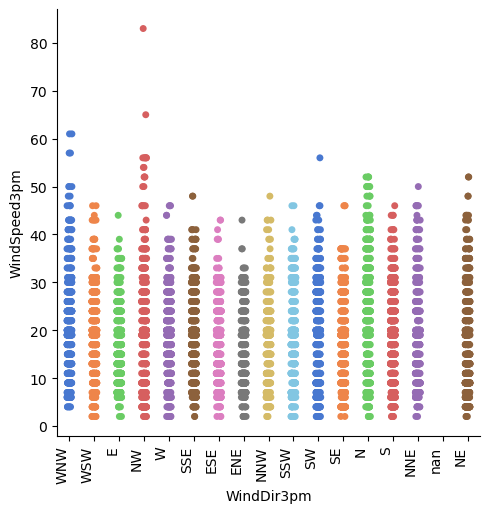

In [34]:
#Checking Wind Direction at 3pm with relation to Wind Speed at 3pm  
sns.catplot(x='WindDir3pm', y='WindSpeed3pm', data=data, hue='WindDir3pm', palette='muted')
plt.xticks(rotation=90, ha='right')
plt.show()

As per 3pm report, Wind Speed is highest in North West(NW) Direction and lowest in East North-East(ENE)

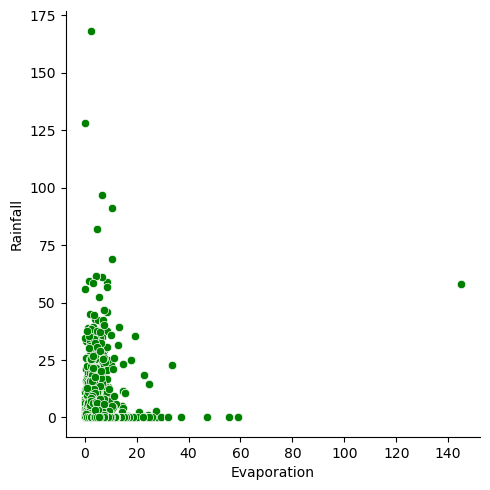

In [39]:
#Let's check relationship between Rainfall (in mm) and Evaporation
sns.relplot(x='Evaporation', y='Rainfall', data=data, color='g')
plt.show()

Most of the data points are accumulated when the Evaporation rate is between 0-20. ASmount of rainfall is the highest when the evaporation is between 0-20

In [160]:
#Converting object data to numerical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [161]:
data.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
Day                int64
Month              int64
Year               int64
dtype: object

In [162]:
list=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [163]:
for i in list:
    data[i]=le.fit_transform(data[i])

In [164]:
data.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
Day                int64
Month              int64
Year               int64
dtype: object

In [165]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,1007.1,8.0,NaN,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,1007.8,NaN,NaN,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,1008.7,NaN,2.0,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,1012.8,NaN,NaN,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,5,12,2008


All variables now have numerical data

In [166]:
#Handling nulls-
from sklearn.impute import SimpleImputer

In [167]:
data.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir         0
WindGustSpeed     991
WindDir9am          0
WindDir3pm          0
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday           0
RainTomorrow        0
Day                 0
Month               0
Year                0
dtype: int64

In [168]:
si=SimpleImputer()

In [169]:
list1=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']

In [170]:
for i in list1:
    data[i]=si.fit_transform(data[i].values.reshape(-1,1))

In [171]:
data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

There are no missing values now. The object data type and null value issues have been fixed

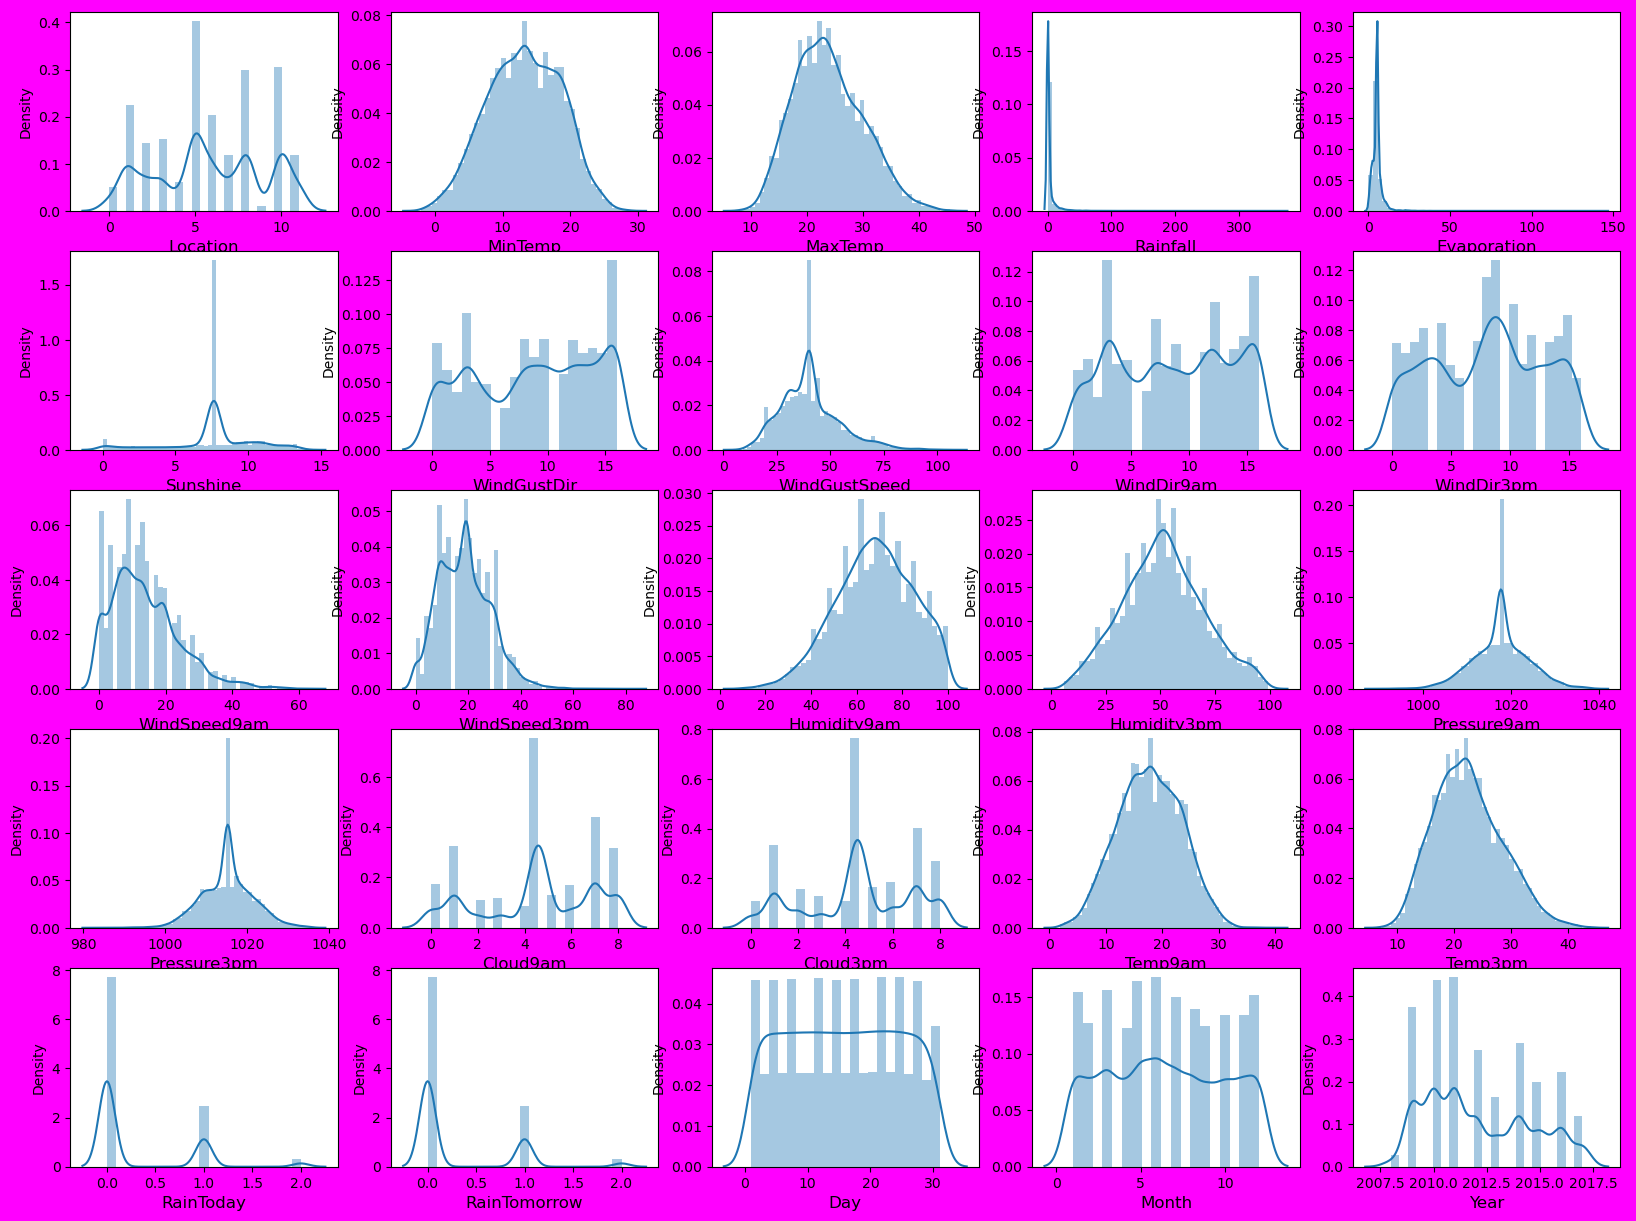

In [60]:
#Let's check distribution of data-
plt.figure(figsize=(20,15), facecolor='magenta')
plotnumber=1

for column in data:
    if plotnumber<=25:
        ax=plt.subplot(5,5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=12)
    plotnumber+=1
plt.show()


Variables like Evaporation, Sunshine, Pressure9am etc seem to be skewed which there can be outliers. 
Distribution for variables likeMinTemp, MaxTemp, Humidity9am etc seem to have normal distribution.

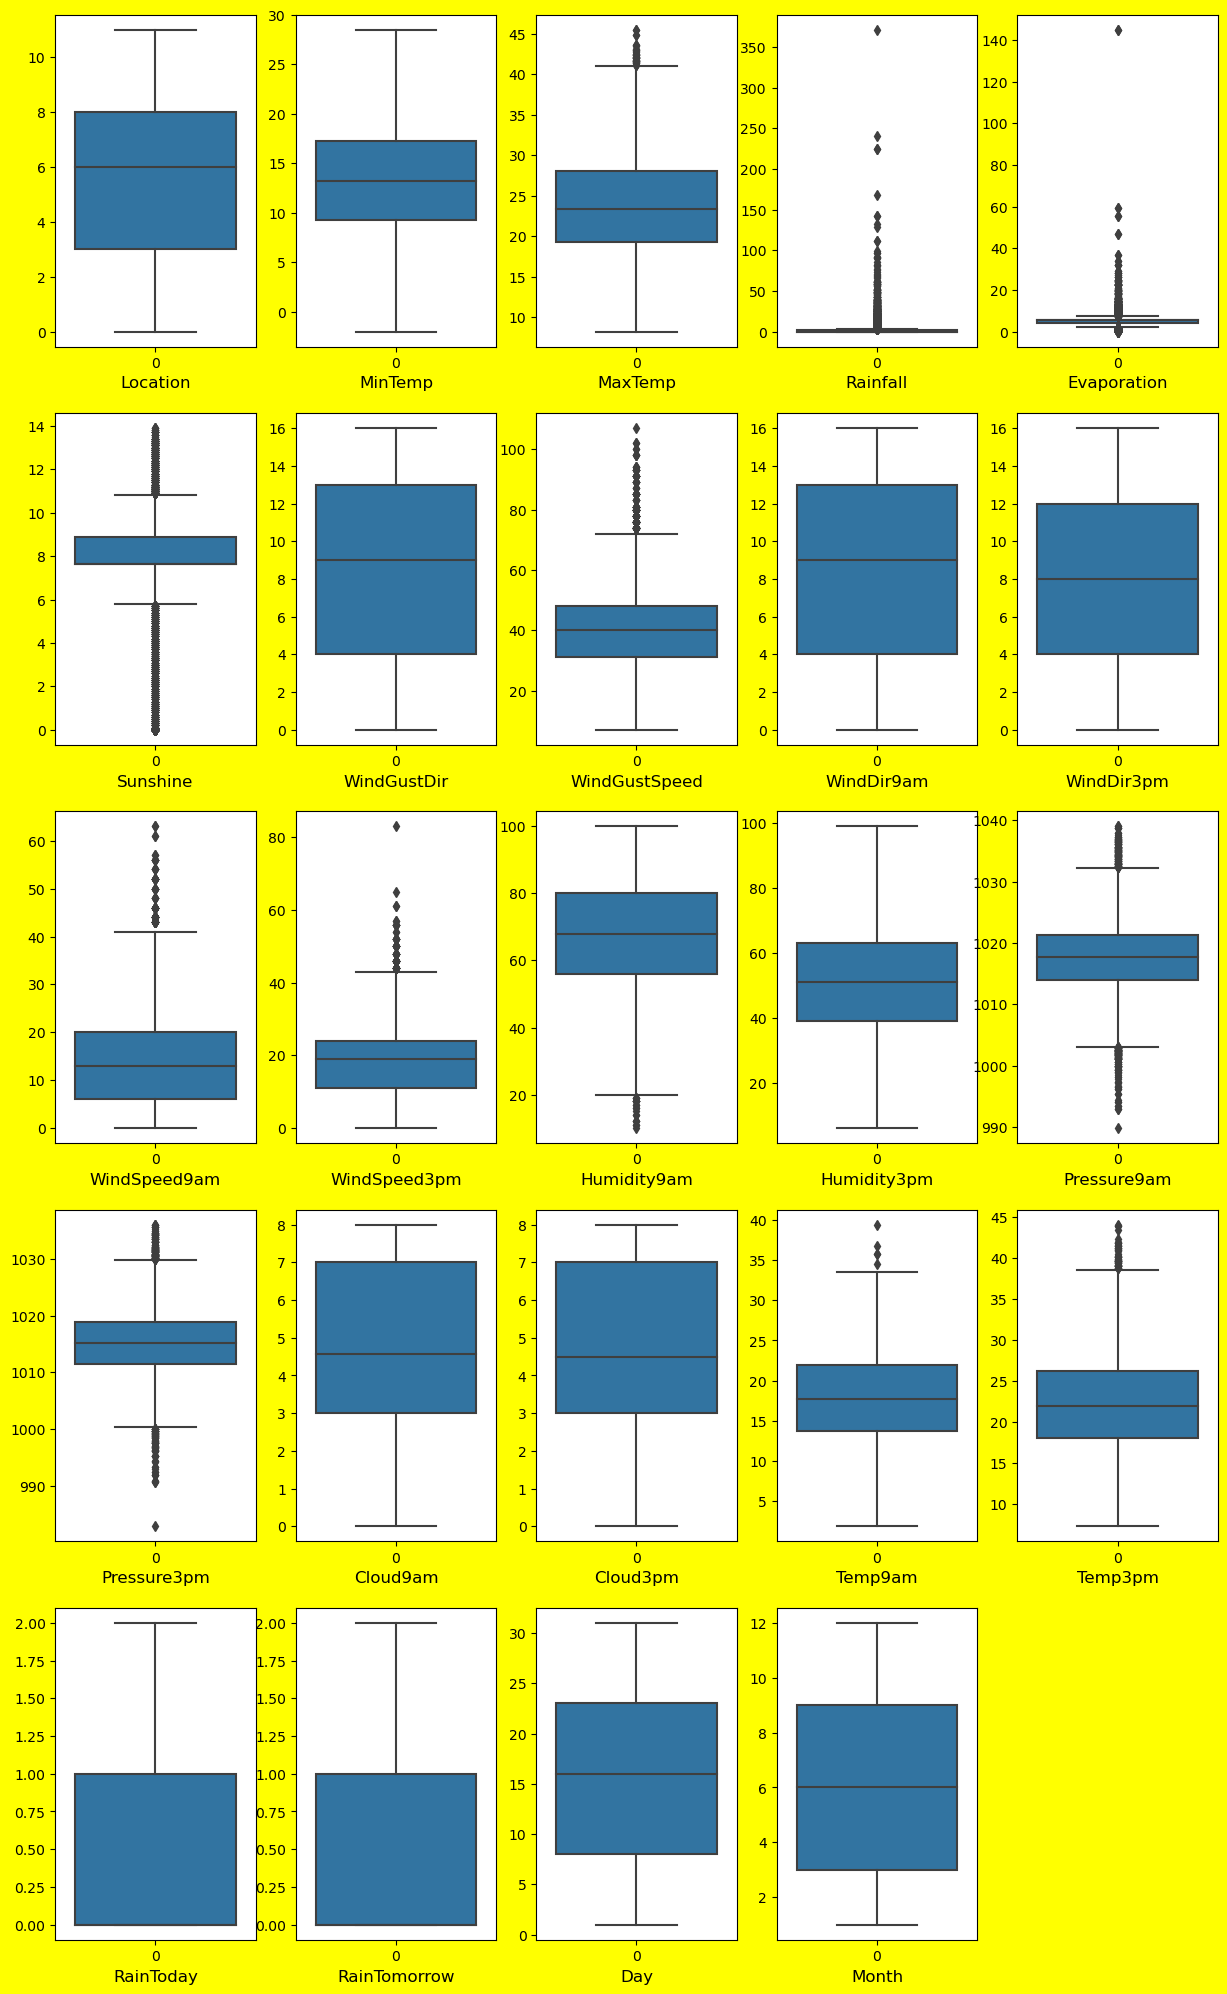

In [61]:
#Checking for outliers
plt.figure(figsize=(15,25), facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<25:
        ax=plt.subplot(5,5, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize=12)
    plotnumber+=1
plt.show()   

Features like MaxTemp,WindGustSpeed, WindSpeed9am, WindSpeed3pm and Temp9am have outliers present in the higher/upper side. 

Humidity has outliers in the lower side.

Variables like Evaporation, Sunshine, Pressure9am and Pressure3pm have outliers present both is higher and lower side. 

Remaining variables don't have any outlier.

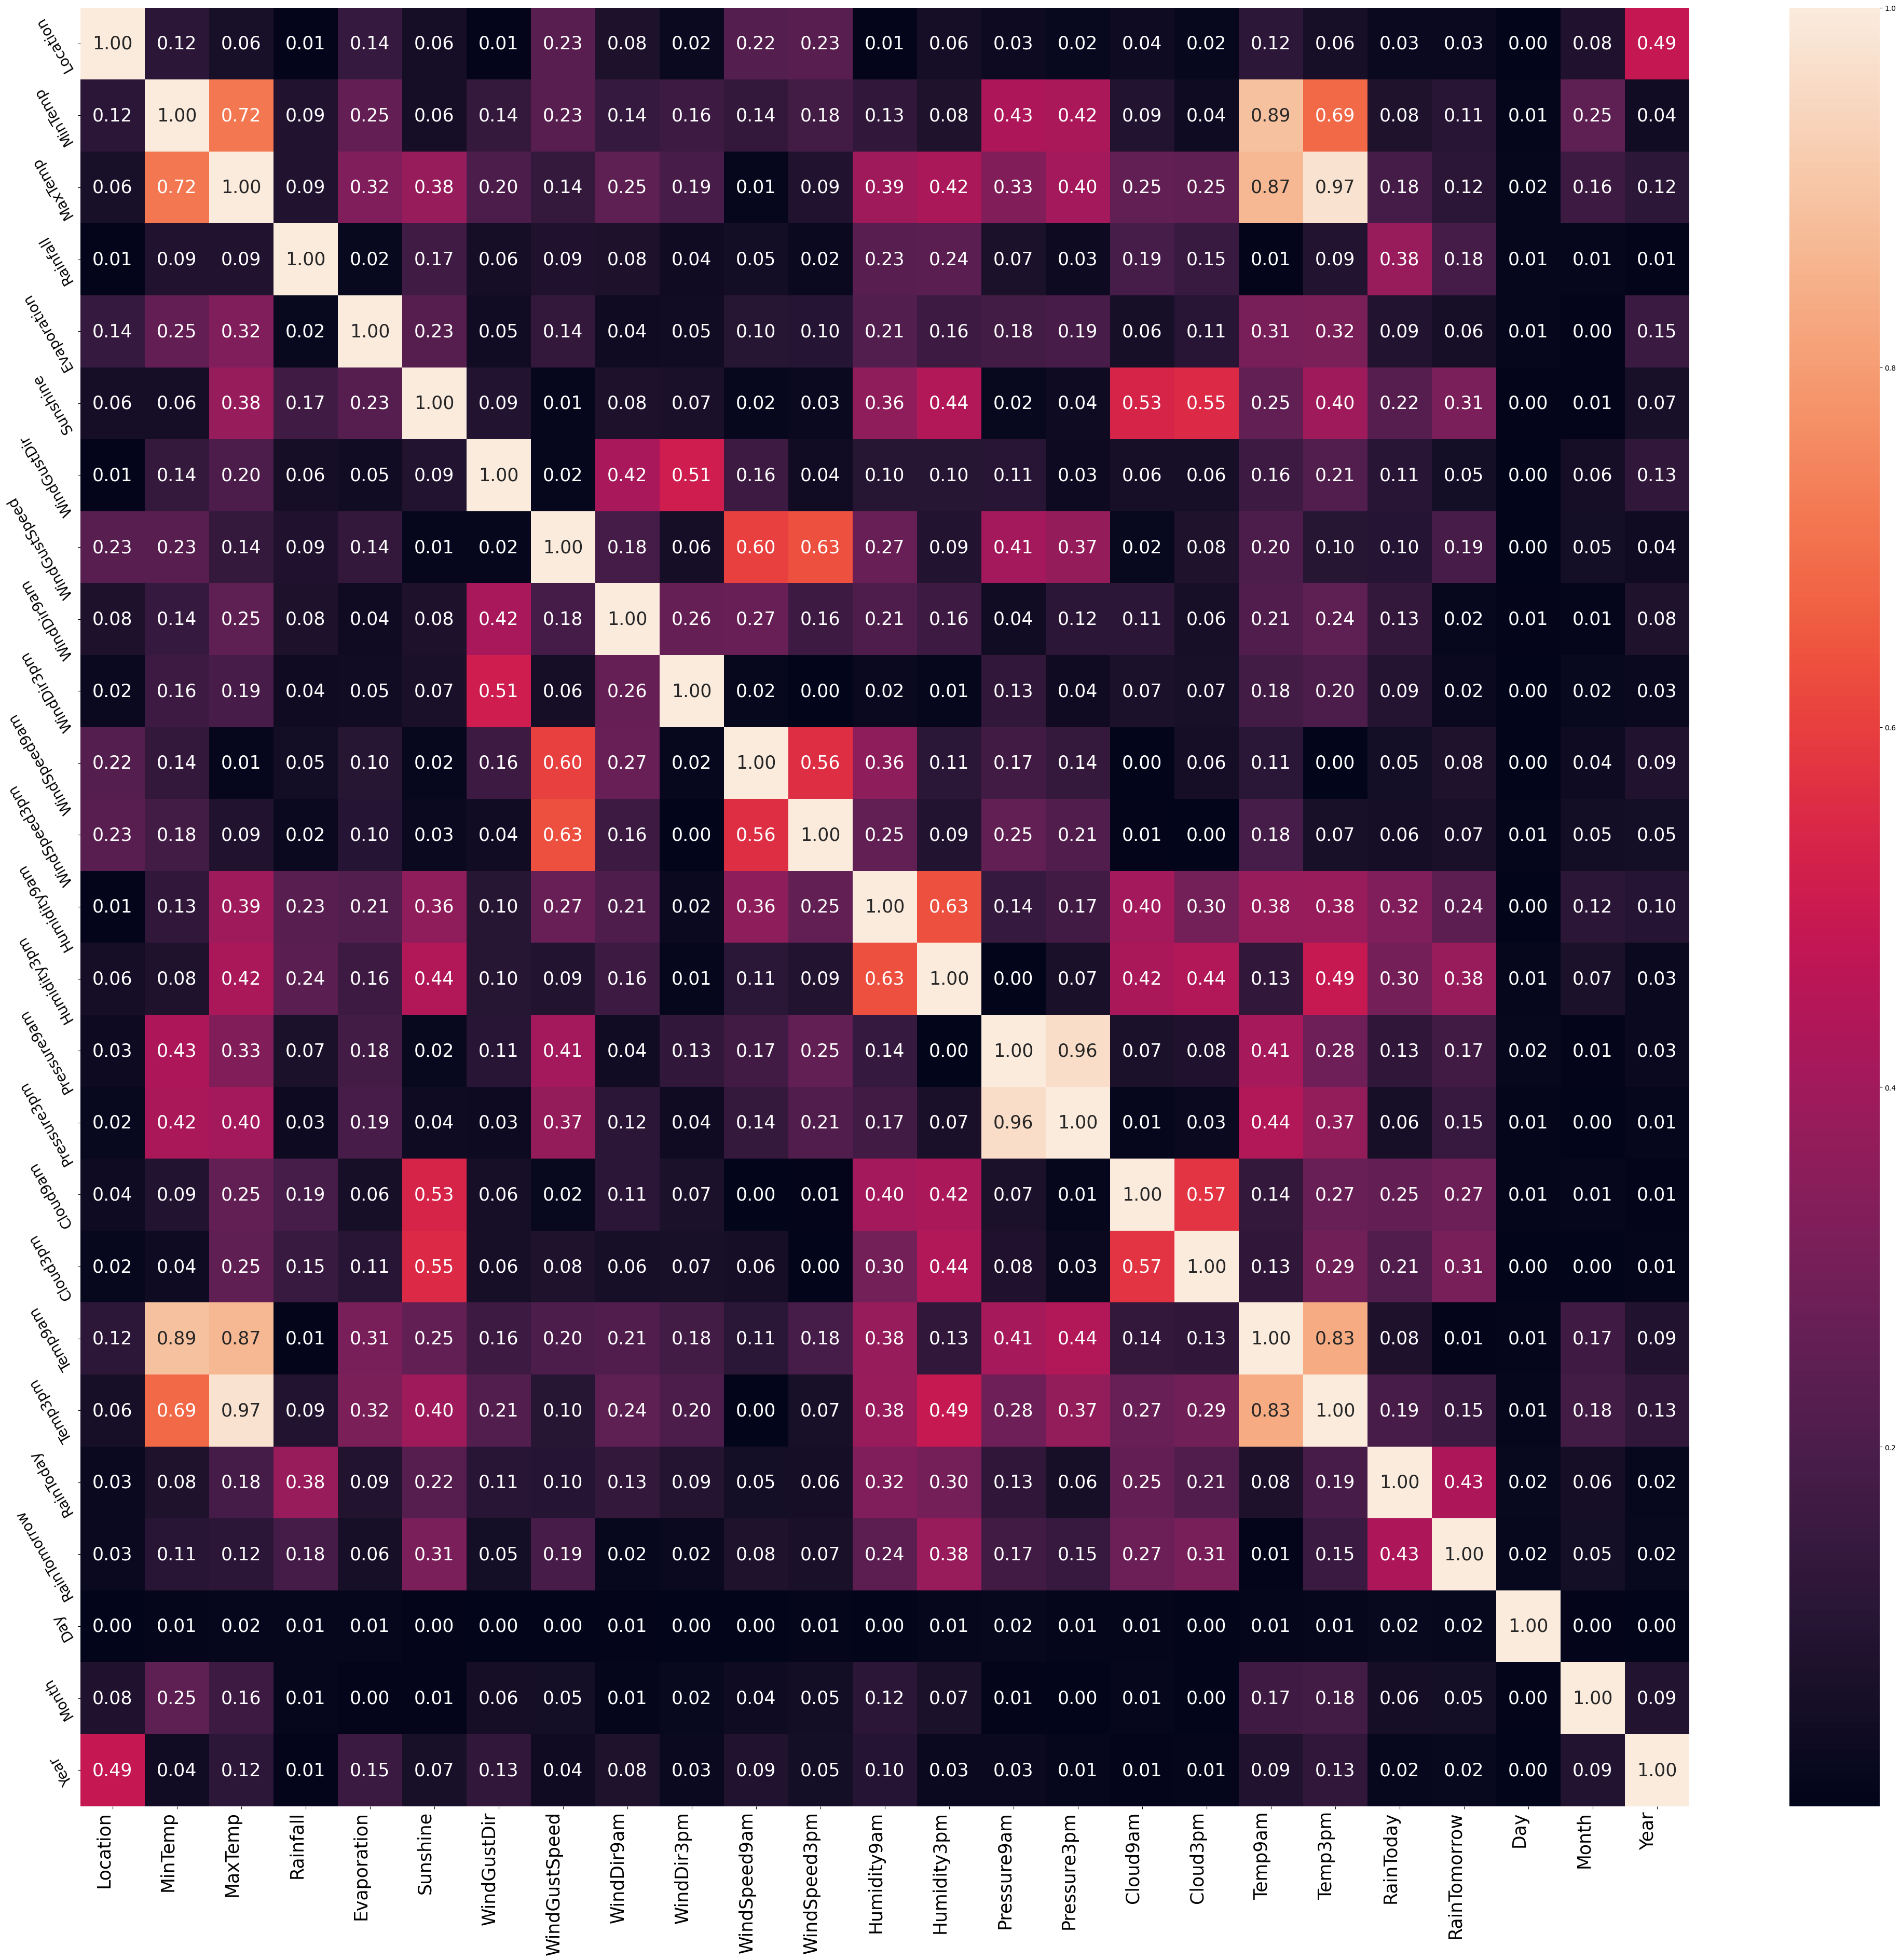

In [76]:
#Checking correlation between features
data_corr=data.corr().abs()
plt.figure(figsize=(50,45))
sns.heatmap(data_corr, annot=True, fmt='0.2f', annot_kws={'size':25})
plt.xticks(rotation=90, ha='right', size=25)
plt.yticks(rotation=120, ha='right', size=20)
plt.show()

Observations-

1. Temp9am and Temp3pm seem to have high correlation.

2. MinTemp and Temp9am also habe high correlation.

3. MaxTemp also has very high correlation with Temp9am and Temp3pm.

4. Pressure9am and Pressure3pm also have the highest correlation. There exists multicollinearity issue among the features with high correlation.

5. Year, Month, Day, Temp9am, Location and WindSpeed3pm have least impact on the label Rainfall.

6. Temp9am, Day, WindDir9am and WindDir3pm seem to be least correlated with the label RainTomorrow

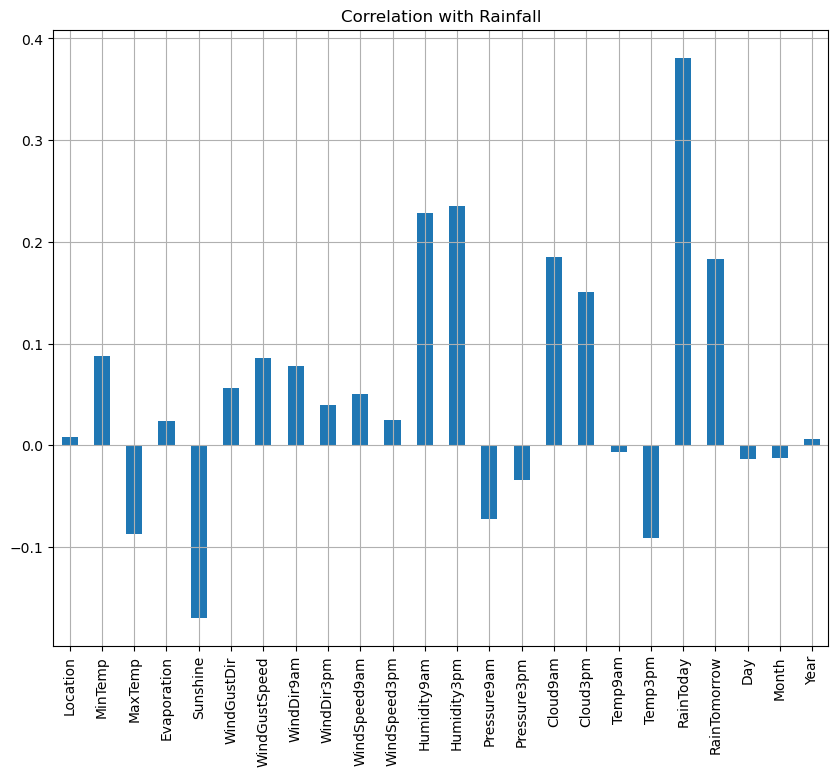

In [77]:
#Let's check the impact of each feature on the label(Rainfall)
data.drop('Rainfall', axis=1).corrwith(data.Rainfall).plot(kind='bar',grid=True, figsize=(10,8), title='Correlation with Rainfall')
plt.show()

Temp3pm is least correlated with the label Rainfall

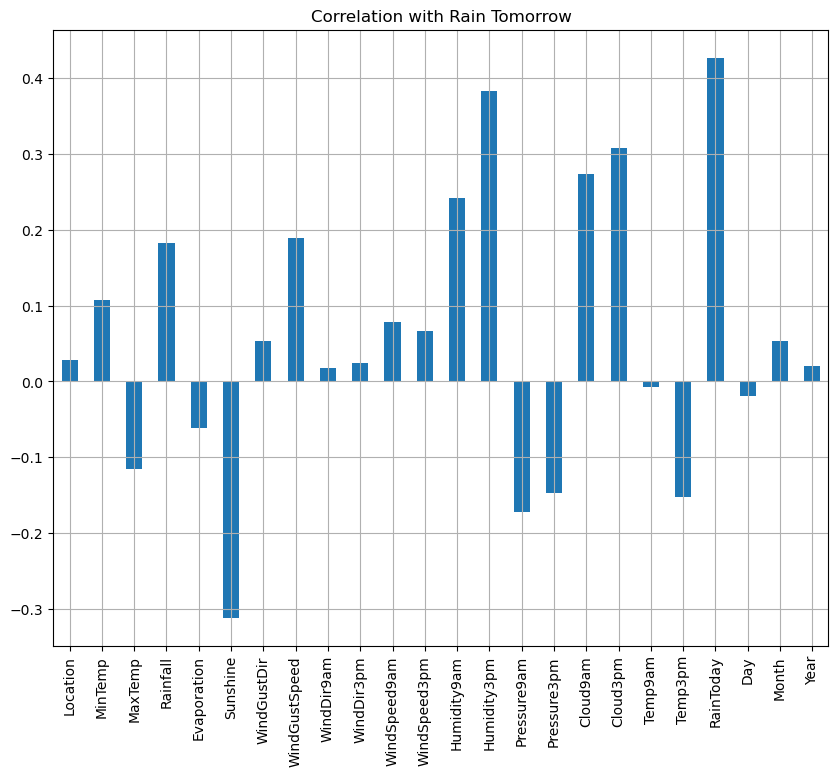

In [78]:
#Let's check the impact of each feature on the label(RainTomorrow)
data.drop('RainTomorrow', axis=1).corrwith(data.RainTomorrow).plot(kind='bar',grid=True, figsize=(10,8), title='Correlation with Rain Tomorrow')
plt.show()

Temp9am also is least correlated with the label RainTomorrow.

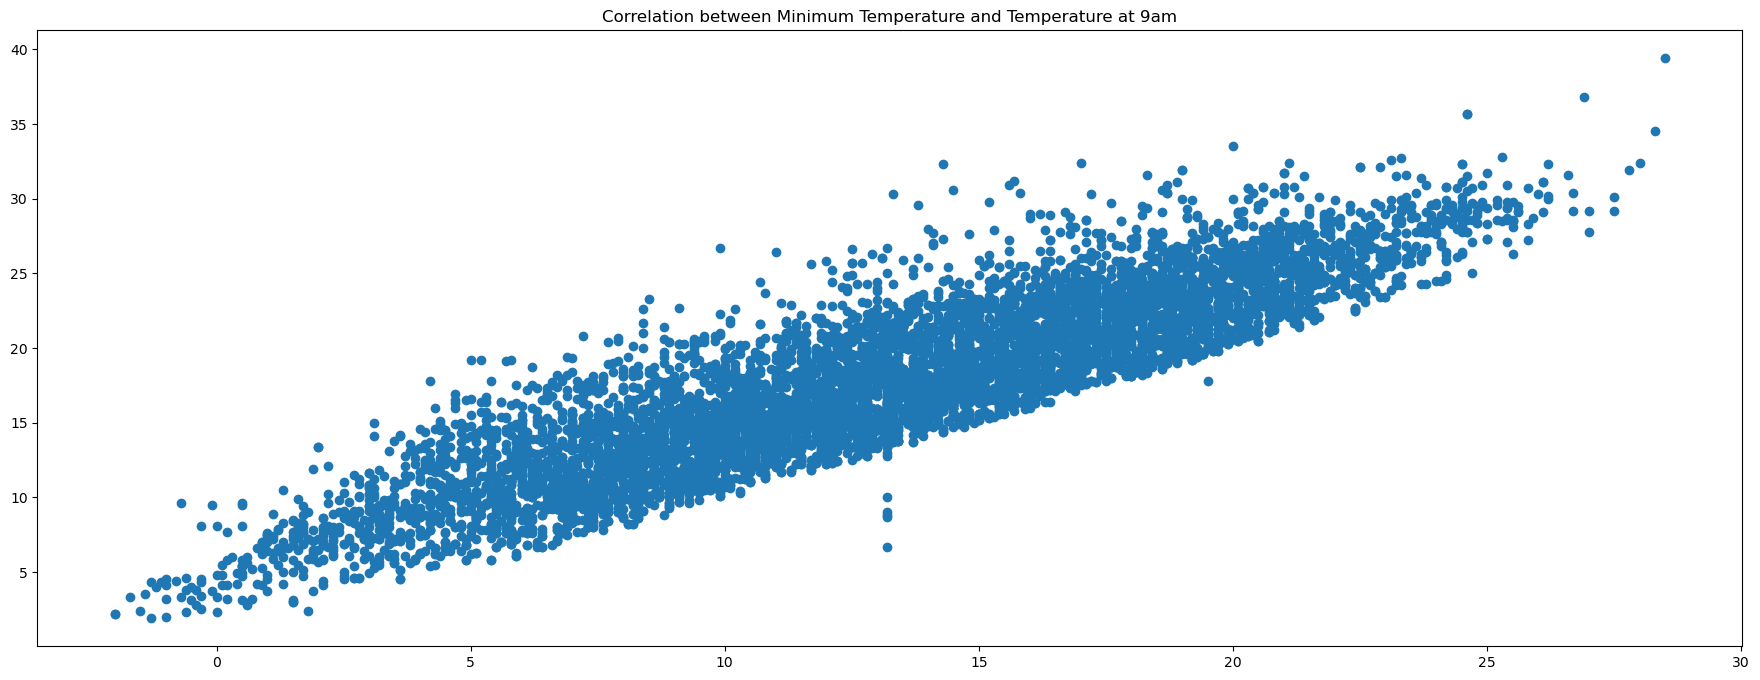

In [81]:
#Correlation between between Minimum Temperature and Temperature at 9am
plt.figure(figsize=(22,8))
plt.scatter(x=data['MinTemp'],y=data['Temp9am'])
plt.title('Correlation between Minimum Temperature and Temperature at 9am')
plt.show()

We see a high postitive correlation between these 2 features.

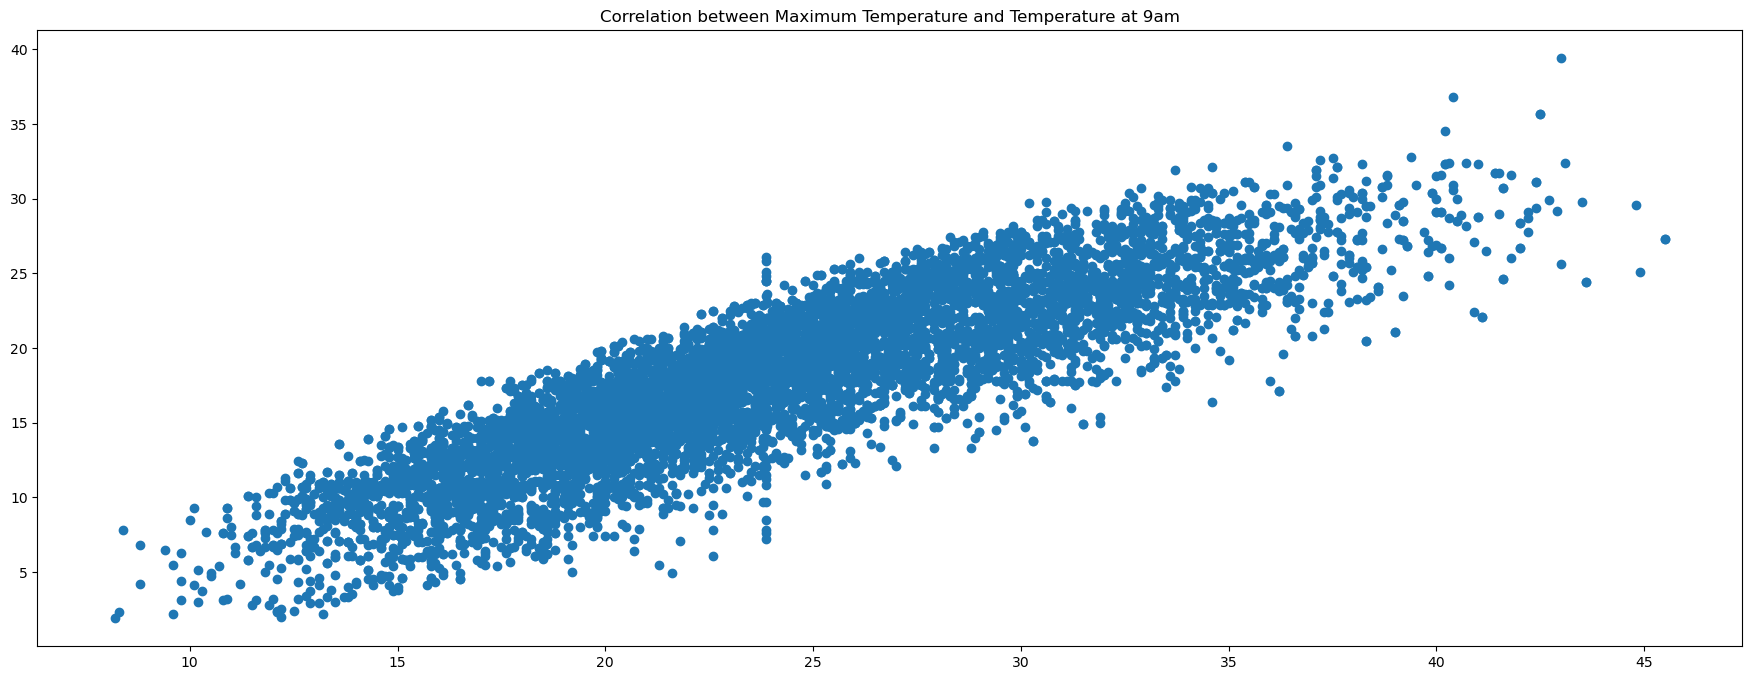

In [82]:
#Correlation between Maximum Temperature and Temperature at 9am
plt.figure(figsize=(22,8))
plt.scatter(x=data['MaxTemp'],y=data['Temp9am'])
plt.title('Correlation between Maximum Temperature and Temperature at 9am')
plt.show()

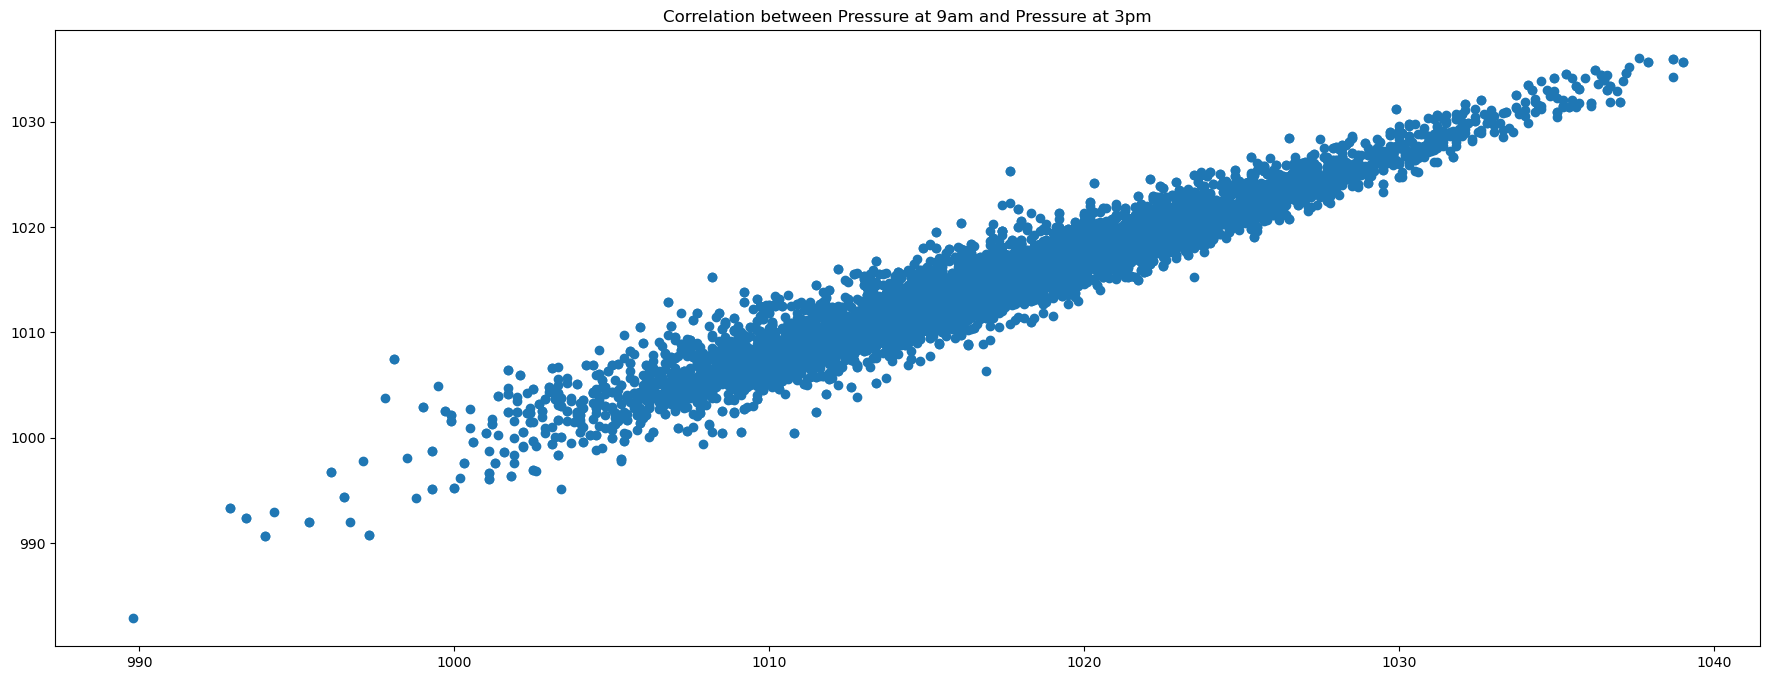

In [83]:
#Correlation between Pressure at 9am and Pressure at 3pm
plt.figure(figsize=(22,8))
plt.scatter(x=data['Pressure9am'],y=data['Pressure3pm'])
plt.title('Correlation between Pressure at 9am and Pressure at 3pm')
plt.show()

There is a very strong positive relation

In [172]:
#Handling outliers
from scipy.stats import zscore

In [173]:
z=np.abs(zscore(data))
abs_z_score=np.abs(z)
filt_ent=(abs_z_score<3.1).all(axis=1)
data=data[filt_ent]

In [174]:
data.shape

(7701, 25)

In [175]:
data.skew()

Location        -0.041602
MinTemp         -0.066523
MaxTemp          0.325913
Rainfall         3.515232
Evaporation      0.847182
Sunshine        -0.724638
WindGustDir     -0.182555
WindGustSpeed    0.527817
WindDir9am      -0.081042
WindDir3pm      -0.068226
WindSpeed9am     0.721185
WindSpeed3pm     0.335418
Humidity9am     -0.231704
Humidity3pm      0.125618
Pressure9am      0.072427
Pressure3pm      0.096934
Cloud9am        -0.340075
Cloud3pm        -0.258538
Temp9am         -0.036358
Temp3pm          0.341765
RainToday        1.261995
RainTomorrow     1.282750
Day             -0.000082
Month            0.065812
Year             0.434516
dtype: float64

In [176]:
data['Evaporation']=np.sqrt(data['Evaporation'])

In [177]:
data['RainToday']=np.cbrt(data['RainToday'])

In [178]:
data.skew()

Location        -0.041602
MinTemp         -0.066523
MaxTemp          0.325913
Rainfall         3.515232
Evaporation     -0.399242
Sunshine        -0.724638
WindGustDir     -0.182555
WindGustSpeed    0.527817
WindDir9am      -0.081042
WindDir3pm      -0.068226
WindSpeed9am     0.721185
WindSpeed3pm     0.335418
Humidity9am     -0.231704
Humidity3pm      0.125618
Pressure9am      0.072427
Pressure3pm      0.096934
Cloud9am        -0.340075
Cloud3pm        -0.258538
Temp9am         -0.036358
Temp3pm          0.341765
RainToday        1.261995
RainTomorrow     1.282750
Day             -0.000082
Month            0.065812
Year             0.434516
dtype: float64

In [179]:
data1=data

In [180]:
data1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,2.321507,7.632205,13,44.0,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0.0,0,1,12,2008
1,1,7.4,25.1,0.0,2.321507,7.632205,14,44.0,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0.0,0,2,12,2008
2,1,12.9,25.7,0.0,2.321507,7.632205,15,46.0,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0.0,0,3,12,2008
3,1,9.2,28.0,0.0,2.321507,7.632205,4,24.0,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0.0,0,4,12,2008
4,1,17.5,32.3,1.0,2.321507,7.632205,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0,5,12,2008


In [181]:
#Separating features and label for classification model
X=data.drop(columns=['RainTomorrow'], axis=1)
y=data['RainTomorrow']

In [182]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8419    0
8420    0
8421    0
8422    0
8423    0
Name: RainTomorrow, Length: 7701, dtype: int32

In [184]:
#Separating features and label for regression model
U=data1.drop(columns=['Rainfall'], axis=1)
v=data1['Rainfall']

In [185]:
v

0       0.6
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
8419    0.0
8420    0.0
8421    0.0
8422    0.0
8423    0.0
Name: Rainfall, Length: 7701, dtype: float64

In [187]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [188]:
X_scaled=scaler.fit_transform(X)

In [189]:
X_scaled

array([[-1.49674216,  0.06641501, -0.14540258, ..., -1.67249113,
         1.6688197 , -1.65153553],
       [-1.49674216, -1.04088479,  0.22097683, ..., -1.55892619,
         1.6688197 , -1.65153553],
       [-1.49674216, -0.02585997,  0.32089848, ..., -1.44536125,
         1.6688197 , -1.65153553],
       ...,
       [ 1.03132613, -1.74217466,  0.25428404, ...,  0.71237263,
        -0.10744629,  2.00857434],
       [ 1.03132613, -1.40998472,  0.52074179, ...,  0.82593757,
        -0.10744629,  2.00857434],
       [ 1.03132613, -0.9670648 ,  0.5373954 , ...,  0.93950251,
        -0.10744629,  2.00857434]])

In [190]:
U_scaled=scaler.fit_transform(U)

In [191]:
U_scaled

array([[-1.49674216,  0.06641501, -0.14540258, ..., -1.67249113,
         1.6688197 , -1.65153553],
       [-1.49674216, -1.04088479,  0.22097683, ..., -1.55892619,
         1.6688197 , -1.65153553],
       [-1.49674216, -0.02585997,  0.32089848, ..., -1.44536125,
         1.6688197 , -1.65153553],
       ...,
       [ 1.03132613, -1.74217466,  0.25428404, ...,  0.71237263,
        -0.10744629,  2.00857434],
       [ 1.03132613, -1.40998472,  0.52074179, ...,  0.82593757,
        -0.10744629,  2.00857434],
       [ 1.03132613, -0.9670648 ,  0.5373954 , ...,  0.93950251,
        -0.10744629,  2.00857434]])

In [192]:
#Handling multicollinearity with PCA
from sklearn.decomposition import PCA
pca=PCA()

In [193]:
pca.fit_transform(X_scaled)

array([[ 3.76702817e-01,  8.79429995e-01,  1.28978356e+00, ...,
        -3.79465960e-01,  6.02071242e-02,  1.40454684e-01],
       [ 8.53622458e-01, -6.03668494e-01,  1.22905872e+00, ...,
        -1.78246226e-01, -5.75457190e-02, -8.94867555e-02],
       [ 1.64710597e+00, -1.85122153e-02,  1.76720462e+00, ...,
        -2.56186490e-01,  2.93966542e-01,  1.76360022e-02],
       ...,
       [-3.79301713e-01, -2.49174991e+00, -2.56804491e-01, ...,
         2.26782381e-01,  6.50809196e-02, -1.54499347e-02],
       [ 1.82124061e-01, -1.74958676e+00,  1.64663866e-03, ...,
         2.99629642e-01,  2.83706249e-03, -8.49026108e-02],
       [ 8.16807142e-01, -2.24520596e+00, -5.04392567e-01, ...,
         1.41739030e-01,  1.79208726e-01, -4.54618966e-02]])

In [194]:
pca.fit_transform(U_scaled)

array([[ 3.99092521e-01,  7.58703176e-01,  1.28576817e+00, ...,
        -3.81868923e-01,  6.33693525e-02,  1.40049071e-01],
       [ 8.67289323e-01, -6.42339292e-01,  1.23827138e+00, ...,
        -1.76368349e-01, -5.92925228e-02, -8.93544899e-02],
       [ 1.66447896e+00, -1.00660010e-01,  1.78517929e+00, ...,
        -2.53858833e-01,  2.93487339e-01,  1.79593133e-02],
       ...,
       [-3.53835659e-01, -2.51841726e+00, -2.37791839e-01, ...,
         2.24297711e-01,  6.72215118e-02, -1.70893500e-02],
       [ 2.05297292e-01, -1.79881448e+00,  1.93699402e-02, ...,
         3.01124231e-01,  4.98601004e-04, -8.51834056e-02],
       [ 8.44973574e-01, -2.29395804e+00, -4.73619219e-01, ...,
         1.40280287e-01,  1.80922384e-01, -4.67739964e-02]])

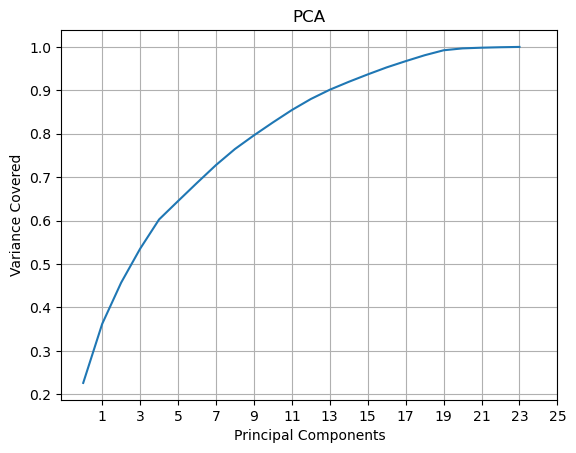

In [195]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(axis='both')
plt.xticks(range(1,26, 2))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

We can see that at 20 features almost 99% of the variance is being covered so, this is the best number of features we can go ahead with.

In [197]:
pca=PCA(n_components=20)
new_comp=pca.fit_transform(X_scaled)

In [198]:
princi_comp=pd.DataFrame(new_comp)

In [199]:
princi_comp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.376703,0.879430,1.289784,-2.266861,-2.617596,-0.840230,-1.598630,1.074756,0.786090,-0.253627,-0.180300,0.417525,1.187705,-1.082310,0.434566,-0.091500,-0.251894,0.585196,0.402775,-0.916598
1,0.853622,-0.603668,1.229059,-2.449761,-2.817461,-0.721755,-1.274738,1.405178,0.787383,0.797584,-0.141171,-0.410616,0.796675,0.083611,0.036709,0.697015,0.130638,-0.703045,-0.067927,0.295823
2,1.647106,-0.018512,1.767205,-2.927783,-2.605597,-0.325429,-1.691075,0.448668,0.632736,-0.069180,0.623986,0.138448,0.003634,-0.788774,0.618150,-0.369811,-0.207067,-0.282877,0.098013,0.037128
3,1.089715,-2.107507,-0.247548,0.624186,-2.916711,-0.027441,-0.867776,1.498194,1.612724,0.101893,-0.186813,1.486409,-0.323928,-0.172291,0.528051,0.604433,-0.103976,-0.058520,-0.045049,-0.537554
4,1.473386,1.180744,-0.566820,-0.281787,-2.882040,-1.100076,-0.808135,1.543491,1.302506,0.628539,0.125772,-0.801360,1.709402,0.798300,0.033426,1.138357,-0.168622,0.520662,0.323398,-1.239641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7696,-0.584722,-2.423601,0.718178,2.259049,1.778184,-0.381100,1.496144,1.254171,0.477081,0.891369,-1.344402,1.284180,0.074220,0.333734,0.105179,-0.169290,-0.206731,-0.245485,-0.013130,0.063139
7697,-0.466210,-2.563463,0.374766,1.484287,1.775223,-0.404182,1.293794,0.842830,0.745327,0.661418,-1.176274,2.207732,-0.202678,-0.102699,-0.133448,-0.082157,0.104398,-0.207835,0.005503,0.238817
7698,-0.379302,-2.491750,-0.256804,0.594818,1.842743,-0.548590,1.214748,0.657042,0.839379,1.086777,-1.024873,1.819589,-0.224668,-0.004729,0.239268,0.121336,-0.318283,-0.161652,-0.003594,-0.489227
7699,0.182124,-1.749587,0.001647,-0.515533,1.754837,-0.813671,0.993188,0.289664,0.677546,1.708458,-1.422002,0.886069,0.116254,-0.874616,-0.786105,-0.228052,0.816226,-0.075354,0.071400,0.468080


In [200]:
new_comp1=pca.fit_transform(U_scaled)

In [201]:
princi_comp1=pd.DataFrame(new_comp1)

In [202]:
princi_comp1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.399093,0.758703,1.285768,-2.330629,-2.583572,-1.035534,1.052855,-1.677195,0.166088,-0.149153,-1.243164,-0.262395,0.405345,0.778430,-0.831967,-0.505707,0.113832,-0.333367,0.743791,-0.865759
1,0.867289,-0.642339,1.238271,-2.407184,-2.842960,-0.542902,0.879038,-2.042251,-0.020557,0.525788,0.043781,0.341538,0.507215,0.752754,0.116660,0.212442,0.568308,0.077140,-0.708912,0.231957
2,1.664479,-0.100660,1.785179,-2.900901,-2.632843,-1.071361,1.173084,-0.917503,0.472669,0.282472,-0.188191,-0.627011,0.310348,-0.194563,-0.602061,-0.743150,-0.141343,-0.242446,-0.237873,-0.005325
3,1.109058,-2.087560,-0.235255,0.744734,-2.937610,-0.171606,0.660686,-2.087866,0.847058,0.062791,-0.852550,-0.477191,-1.104297,-0.354751,0.136681,-0.300489,0.678613,-0.180590,-0.138429,-0.620865
4,1.491092,1.123561,-0.595827,-0.368338,-2.808513,-0.477328,0.372775,-2.322242,0.302280,0.729629,-0.588169,0.263640,1.265461,1.601546,1.057923,0.491493,0.654069,-0.062119,0.723028,-1.095496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7696,-0.568041,-2.386689,0.720491,2.318003,1.778222,1.178498,-1.235084,-1.568053,-0.620556,-0.049588,-0.615206,0.614380,-1.418832,0.207763,0.201326,-0.139523,-0.169913,-0.175848,-0.274389,0.012733
7697,-0.444805,-2.554960,0.387107,1.548330,1.761091,0.785077,-1.312783,-1.430184,-0.303231,-0.175784,-0.817269,0.052671,-2.162057,-0.076829,-0.318043,0.029778,0.070608,-0.005528,-0.262722,0.150393
7698,-0.353836,-2.518417,-0.237792,0.644686,1.821631,0.556510,-1.421470,-1.447792,-0.297657,0.244281,-0.600796,0.235841,-1.843507,-0.131247,0.006075,-0.202570,0.187486,-0.362499,-0.231730,-0.615988
7699,0.205297,-1.798814,0.019370,-0.499449,1.735699,0.113470,-1.505528,-1.343491,-0.577292,0.538744,-0.198928,1.173988,-1.313468,0.078458,-1.311379,0.465356,0.116206,0.572499,-0.055636,0.422175


In [203]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split

In [204]:
X_train, X_test, y_train, y_test=train_test_split(princi_comp, y, test_size=0.30, random_state=42)

In [205]:
y_train

3021    0
3112    1
5965    0
4845    0
6976    0
       ..
5768    0
5973    0
905     0
8326    0
7988    0
Name: RainTomorrow, Length: 5390, dtype: int32

In [207]:
#Handling imbalanced data
from collections import Counter
from imblearn.over_sampling import SMOTE

In [208]:
Counter(data['RainTomorrow'])

Counter({0: 5929, 1: 1772})

In [209]:
Counter(y_train)

Counter({0: 4155, 1: 1235})

In [210]:
over_smp=SMOTE(random_state=42, k_neighbors=3, sampling_strategy=0.70)

In [211]:
X_train_ns,y_train_ns= over_smp.fit_resample(X_train,y_train)

In [212]:
Counter(y_train_ns)

Counter({0: 4155, 1: 2908})

In [213]:
U_train,U_test,v_train,v_test=train_test_split(princi_comp1, v, test_size=0.30, random_state=42)

In [214]:
v_train

3021    0.0
3112    4.8
5965    0.0
4845    0.2
6976    0.0
       ... 
5768    0.8
5973    5.2
905     0.0
8326    0.0
7988    0.4
Name: Rainfall, Length: 5390, dtype: float64

In [219]:
#Let's start with classification model first-
#Writing one function to call it for multiple models

def metric_score(clf, X_train, X_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(X_train)
        print("\n---------------Train Result-------------")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
              
    elif not train:
              pred=clf.predict(X_test)
              print("\n---------------Test Result-------------")
              print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")

In [220]:
#Using K Neighbors Classifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [221]:
knn.fit(X_train_ns,y_train_ns)

KNeighborsClassifier()

In [222]:
metric_score(knn,X_train, X_test, y_train, y_test, train=True)
metric_score(knn,X_train, X_test, y_train, y_test,train=False)


---------------Train Result-------------
Accuracy Score:88.33%

---------------Test Result-------------
Accuracy Score:79.62%


In [223]:
#Using Cross validation to see if model is overfitting/stable model
from sklearn.model_selection import cross_val_score

In [224]:
for k in range(3,6):
    cv_score=cross_val_score(knn,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.8065186339436435


 at 4, cross val score is 0.8062572318647084


 at 5, cross val score is 0.8185931719156898




In [225]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [226]:
rf.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [227]:
metric_score(rf,X_train, X_test, y_train, y_test, train=True)
metric_score(rf,X_train, X_test, y_train, y_test,train=False)


---------------Train Result-------------
Accuracy Score:100.00%

---------------Test Result-------------
Accuracy Score:86.89%


In [228]:
for k in range(3,6):
    cv_score=cross_val_score(rf,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.8393715101934814


 at 4, cross val score is 0.7982017774541139


 at 5, cross val score is 0.833786797239101




In [229]:
#Using Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()

In [230]:
gbdt.fit(X_train_ns,y_train_ns)

GradientBoostingClassifier()

In [231]:
metric_score(gbdt,X_train, X_test, y_train, y_test, train=True)
metric_score(gbdt,X_train, X_test, y_train, y_test,train=False)


---------------Train Result-------------
Accuracy Score:86.75%

---------------Test Result-------------
Accuracy Score:82.82%


In [232]:
for k in range(3,6):
    cv_score=cross_val_score(gbdt,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.8269055966757564


 at 4, cross val score is 0.7607999892112042


 at 5, cross val score is 0.8023586471931703




In [233]:
import xgboost as xgb
xgb=xgb.XGBClassifier()

In [234]:
xgb.fit(X_train_ns,y_train_ns)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [235]:
metric_score(xgb,X_train, X_test, y_train, y_test, train=True)
metric_score(xgb,X_train, X_test, y_train, y_test,train=False)


---------------Train Result-------------
Accuracy Score:99.96%

---------------Test Result-------------
Accuracy Score:86.85%


In [236]:
for k in range(3,6):
    cv_score=cross_val_score(xgb,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.8044409816906896


 at 4, cross val score is 0.7714521719194616


 at 5, cross val score is 0.812360838382902




We are getting the best accuracy score 86.89% with Random Forest Classifier model. The cross validation score at cv=3 is 83.9%.
Other model which is again performing well is XGBoost classifier model with accuracy score of 86.85% however, Random Forest Classifier model has a higher score.
We can conclude that Random Forest Classifier model is the best fitted model as it works great on test data and has best CV score as well.

In [253]:
#Let's use hyperperameter tuning technique to stabilize model and to generalize it for unseen data.
from sklearn.model_selection import GridSearchCV

In [257]:
param_grid={'max_depth':[40,50,70],
             'n_jobs':[1, 2],
             'n_estimators':[50,100],
            'criterion':['gini','entropy']
            }

In [258]:
gridsearch=GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)

In [259]:
gridsearch.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [40, 50, 70], 'n_estimators': [50, 100],
                         'n_jobs': [1, 2]})

In [260]:
gridsearch.best_params_

{'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 100, 'n_jobs': 2}

In [261]:
Final_model=RandomForestClassifier(criterion='entropy', max_depth= 50,n_jobs=2,n_estimators=100)

In [262]:
Final_model.fit(X_train_ns,y_train_ns)

RandomForestClassifier(criterion='entropy', max_depth=50, n_jobs=2)

In [264]:
pred=Final_model.predict(X_test)

In [265]:
acc=accuracy_score(y_test,pred)
print(acc*100)

87.53786239723064


After tuning the parameters, we are still getting 87% as accuracy score which implies that this is a generalized model that will work well on unseen data

In [266]:
#Predicting RainTomorrow
y_pred = Final_model.predict(X_test)
datan = pd.DataFrame({'Actual' : y_test, 'RF predicted': y_pred})

In [267]:
datan

,Actual,RF predicted
4211,1,1
6205,0,0
6681,0,0
8296,0,0
1560,0,0
...,...,...
4389,1,1
8265,0,0
5643,0,1
7718,1,0


In [237]:
#Importing libraries for regression model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [238]:
#Using Linear Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [239]:
reg.fit(U_train,v_train)

LinearRegression()

In [240]:
pred_train=reg.predict(U_train)
pred_test=reg.predict(U_test)
print(f" training accuracy is {r2_score(v_train,pred_train)}")
print(f" testing accuracy is {r2_score(v_test,pred_test)}")
mean_score = metrics.mean_absolute_error(v_test,pred_test)
print("Mean Absolute Error Score:",mean_score)

 training accuracy is 0.4859815430547477
 testing accuracy is 0.5014185177469398
Mean Absolute Error Score: 1.6416472374281619


In [241]:
#Checking cross validation score to ensure model isn't overfitting-
for k in range(3,6):
    cv_score=cross_val_score(reg,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.4828512998487878


 at 4, cross val score is 0.4792458738535379


 at 5, cross val score is 0.485174788885325




In [242]:
#Using Grandient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [243]:
gbr.fit(U_train,v_train)

GradientBoostingRegressor()

In [244]:
pred_train1=gbr.predict(U_train)
pred_test1=gbr.predict(U_test)
print(f" training accuracy is {r2_score(v_train,pred_train1)}")
print(f" testing accuracy is {r2_score(v_test,pred_test1)}")
mean_score = metrics.mean_absolute_error(v_test,pred_test1)
print("Mean Absolute Error Score:",mean_score)

 training accuracy is 0.6967044927024386
 testing accuracy is 0.4983886665712547
Mean Absolute Error Score: 1.6389721987736434


In [245]:
#Checking cross validation score to ensure model isn't overfitting-
for k in range(3,6):
    cv_score=cross_val_score(gbr,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.5004544383266729


 at 4, cross val score is 0.4833320027913764


 at 5, cross val score is 0.5117779257294572




In [248]:
#Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [249]:
rfr.fit(U_train,v_train)

RandomForestRegressor()

In [250]:
pred_train2=rfr.predict(U_train)
pred_test2=rfr.predict(U_test)
print(f" training accuracy is {r2_score(v_train,pred_train2)}")
print(f" testing accuracy is {r2_score(v_test,pred_test2)}")
mean_score = metrics.mean_absolute_error(v_test,pred_test2)
print("Mean Absolute Error Score:",mean_score)

 training accuracy is 0.942031381806626
 testing accuracy is 0.5421877116896237
Mean Absolute Error Score: 1.3636231068801385


In [251]:
#Checking cross validation score to ensure model isn't overfitting-
for k in range(3,6):
    cv_score=cross_val_score(rfr,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.5354704990350148


 at 4, cross val score is 0.516413723348742


 at 5, cross val score is 0.567492410785843




In [268]:
#Using KNeighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [269]:
knn.fit(U_train,v_train)

KNeighborsRegressor()

In [270]:
pred_train3=knn.predict(U_train)
pred_test3=knn.predict(U_test)
print(f" training accuracy is {r2_score(v_train,pred_train3)}")
print(f" testing accuracy is {r2_score(v_test,pred_test3)}")
mean_score = metrics.mean_absolute_error(v_test,pred_test3)
print("Mean Absolute Error Score:",mean_score)

 training accuracy is 0.6597411870143746
 testing accuracy is 0.458956170948133
Mean Absolute Error Score: 1.347148420597144


In [271]:
#Checking cross validation score to ensure model isn't overfitting-
for k in range(3,6):
    cv_score=cross_val_score(knn,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.035560499133282


 at 4, cross val score is 0.056809540601674174


 at 5, cross val score is 0.05178158469774667




We can see that Random Forest Regressor model works best on test data and Mean absolute score is the lowest. We are getting r2 score of 54% with this model and Mean Absolute Error score of 1.36. At CV=5, we are getting 56% r2 score when actual test score is 54% and MAE is 1.36. Also, Linear Regression is performing well with 50% r2-score however, it is lower than Random Forest Regressor. Hence, Random Forest Regressor model seems to be the best model and we will move ahead with this.

In [272]:
#Hyper parameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [273]:
parameter={'max_depth':[40,50,70],
          'n_jobs':[1, 2],
          'n_estimators':[50,100]}

In [274]:
GCV=GridSearchCV(estimator=rfr, param_grid=parameter, cv=5)


In [275]:
GCV.fit(U_train,v_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [40, 50, 70], 'n_estimators': [50, 100],
                         'n_jobs': [1, 2]})

In [276]:
GCV.best_params_

{'max_depth': 40, 'n_estimators': 100, 'n_jobs': 1}

In [277]:
Final_model=RandomForestRegressor(max_depth=40,n_estimators=100,n_jobs= 1)

In [278]:
Final_model.fit(U_train,v_train)

RandomForestRegressor(max_depth=40, n_jobs=1)

In [279]:
pred1=Final_model.predict(U_test)

In [280]:
R2s=r2_score(v_test,pred1)
print(R2s*100)

54.26343305163361


In [282]:
data_n = pd.DataFrame({'Actual' : v_test, 'RFR predicted': pred1})

In [283]:
data_n

,Actual,RFR predicted
4211,0.0,0.018333
6205,0.0,0.096000
6681,0.0,0.018035
8296,0.0,0.010000
1560,0.0,0.075153
...,...,...
4389,0.0,0.060000
8265,0.0,0.060056
5643,1.8,6.414000
7718,0.0,0.286009
